In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
# Load the dataset
df = pd.read_excel("/content/Glass(1).xlsx")

In [3]:
# Step 1: Exploratory Data Analysis (EDA)
print("Dataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None

Summary Statistics:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000   

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


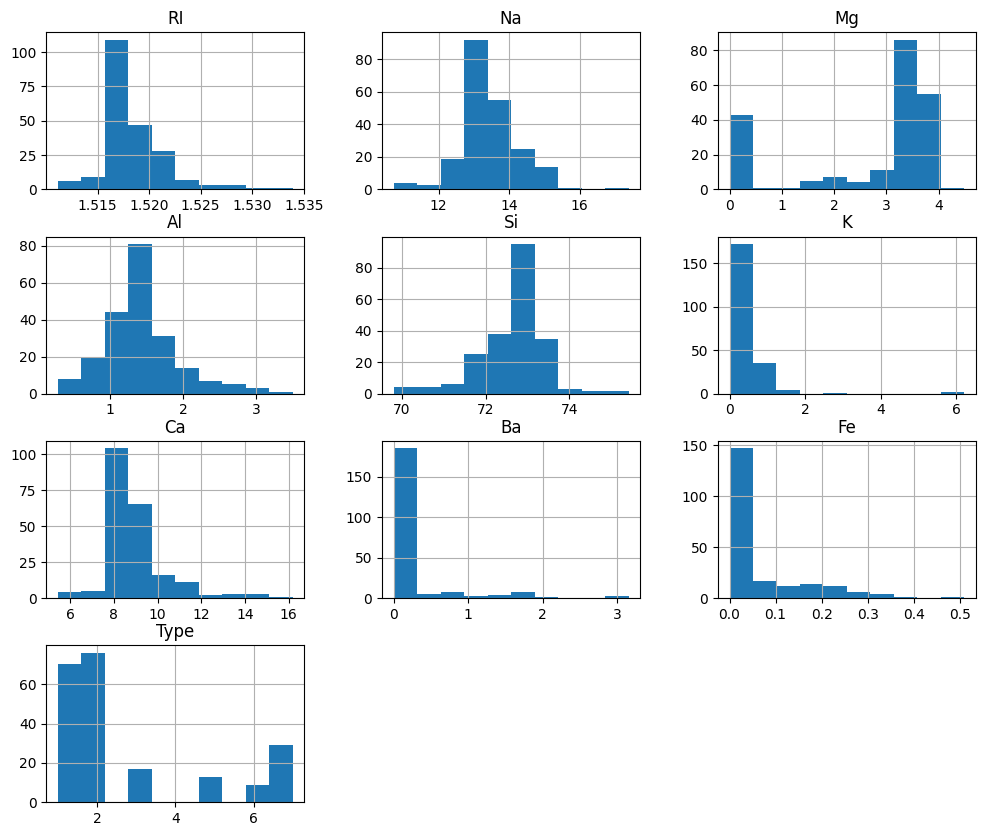

In [5]:
# Step 2: Data Visualization
# Visualize feature distributions
df.hist(figsize=(12, 10))
plt.show()

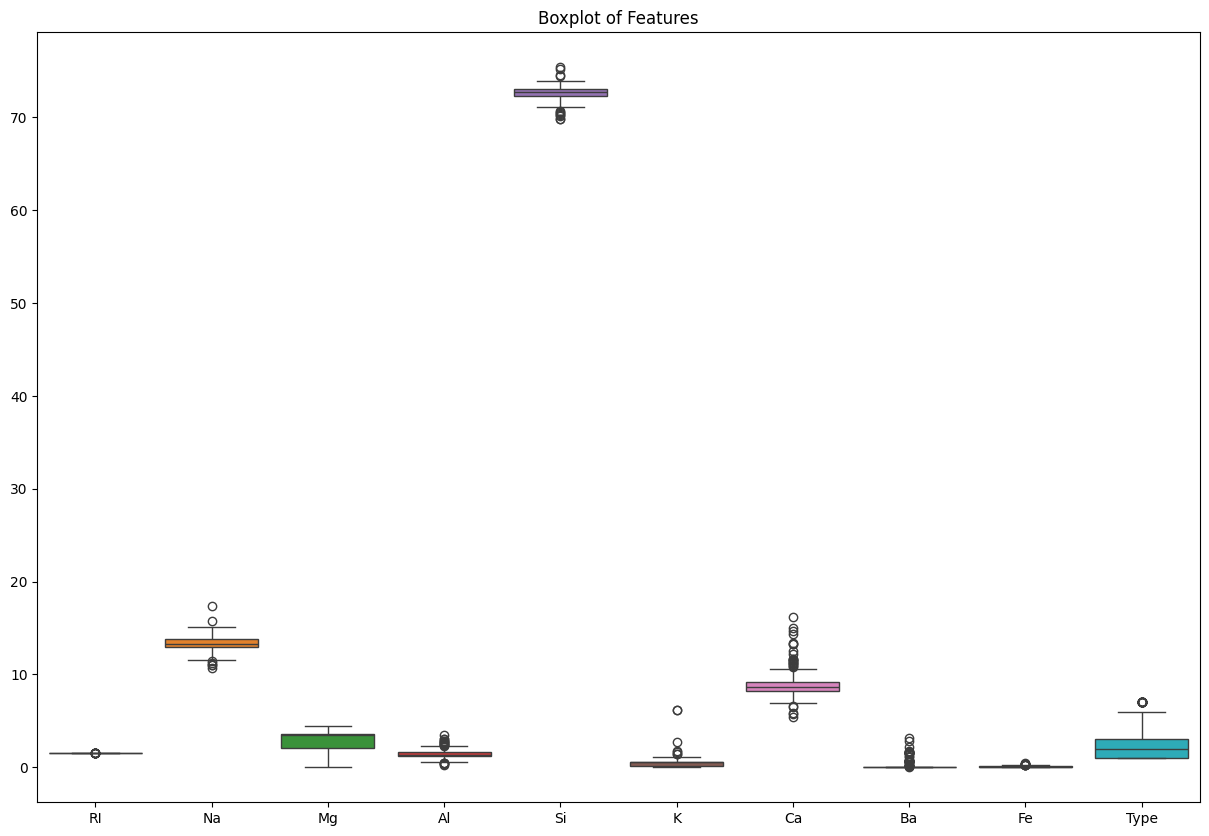

In [6]:
# Box plots for identifying outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.show()

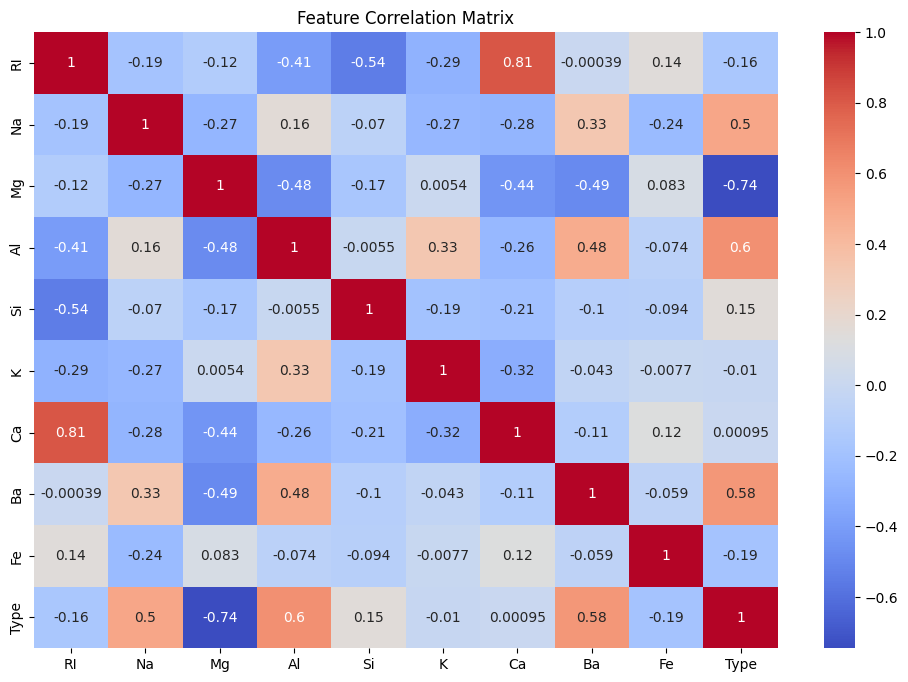

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [8]:
# Step 3: Data Preprocessing
# Handle missing values (if any)
df.fillna(df.median(), inplace=True)

In [9]:
# Separate features and target variable
X = df.drop("Type", axis=1)  # Type is our target column
y = df["Type"]

In [10]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Step 4: Random Forest Model Implementation
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))


Random Forest Model Evaluation:
Accuracy: 0.8372093023255814
Precision: 0.866828165374677
Recall: 0.8372093023255814
F1-Score: 0.8330452594474481


In [15]:
# Step 5: Bagging and Boosting Methods
# Bagging with Random Forest
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
print("\nBagging Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, bagging_pred))


Bagging Model Evaluation:
Accuracy: 0.8372093023255814


In [16]:
# Boosting with AdaBoost
boosting_model = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_pred = boosting_model.predict(X_test)
print("\nBoosting Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, boosting_pred))


Boosting Model Evaluation:
Accuracy: 0.5348837209302325


In [17]:
# Step 6: Compare Results and Explain Bagging vs Boosting
print("\nComparison of Results:")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Bagging Accuracy: {accuracy_score(y_test, bagging_pred):.2f}")
print(f"Boosting Accuracy: {accuracy_score(y_test, boosting_pred):.2f}")


Comparison of Results:
Random Forest Accuracy: 0.84
Bagging Accuracy: 0.84
Boosting Accuracy: 0.53
